In [875]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [876]:
#本机器学习代码将输出各节点权重值和最后各个样本的损失
#陈逍风编写
# O-----O----O\
#   \ /        \
#    X          --O---O
#   / \        /
# O-----O----O/
# Layer1    Layer2
#该神经网络由两层构成,以随机反向传播训练

In [877]:
datas=np.asarray([[0,1,0],[1,1,1],[1,0,0],[0,0,1],[0.6,0.7,1],[0.3,0.8,0],[0.7,0.4,0]])

In [878]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))
def dsigmoid(x):
    return x*(1-x)
def Cost(Ans,ExceptAns):
    return (ExceptAns-Ans)**2/2
def dCost(Ans,ExceptAns):
    return -1*(ExceptAns-Ans)
def MultiMat(m1,m2):
    return [m1[0]*m2[0],m1[1]*m2[1]]
def DotMulti(m1,m2):
    return m1[0]*m2[0]+m1[1]*m2[1]

Layer1=[np.asarray([0.1,0.3,0.2,0.4]).reshape(2,2),np.asarray([0.7,0.8])]
Layer2=[np.asarray([0.5,0.6]),np.asarray([0.9])]
cost=1

In [879]:
def CalculateLearn(X,ExceptAns,costO=[0]):
    Z1 = np.asarray(list(map(sigmoid,np.dot(X,Layer1[0])+Layer1[1]))) #第一层的输出
    Z2 = (sigmoid(DotMulti(Z1,Layer2[0])+Layer2[1]))[0]                   #第二层的输出
    #print(f"Z1={Z1}")
    #print(f"Z2={Z2}")
    cost=Cost(Z2,ExceptAns)                                             #损失
    costO[0]=cost
    #print(f"cost={cost}")

    dZ2=dCost(Z2,ExceptAns)*dsigmoid(Z2)                            #第二层的偏导
    dLayer2=np.asarray([dZ2*Z1[0],dZ2*Z1[1]]),np.asarray([dZ2])   #第二层参数的偏导

    dZ1=MultiMat([dZ2*Layer2[0][0],dZ2*Layer2[0][1]] , [dsigmoid(Z1[0]),dsigmoid(Z1[1])])
    dLayer1=np.asarray([ [dZ1[0]*X[0],dZ1[1]*X[0]] ,[dZ1[0]*X[1],dZ1[1]*X[1]] ]),np.asarray(dZ1)  #第一层参数的偏导
    #print(f"最后的改变值={dZ2}")
    dLayer=[dLayer1,dLayer2]                                                    #格式[[第一层扭转],[第一层平移]],[第二层扭转,第二层平移]
    return dLayer

#测试
#CalculateLearn(datas[1][0:2],1)

In [880]:
learntimes=50000    #学习次数
fc=0.8             #学习率
cost=[0.1]
for i in range(learntimes):
    index = random.randint(0,len(datas)-1)
    d=CalculateLearn(datas[index][0:2],datas[index][2],cost)
    Layer1[0] = Layer1[0] - d[0][0]*fc
    Layer1[1] = Layer1[1] - d[0][1]*fc
    Layer2[0] = Layer2[0] - d[1][0]*fc
    Layer2[1] = Layer2[1] - d[1][1]*fc
    #print(Calculate(datas[index][0:2]))
print(Layer1)
print(Layer2)
print(cost[0])


[array([[-9.1504064 , -8.16831672],
       [-9.1210933 , -8.31900388]]), array([10.89539609,  3.38127709])]
[array([-14.02005754,  11.31543288]), array([6.72867145])]
0.00032046126030256105


In [881]:
################################################################################################
#以上为学习段    以下为验证段#
################################################################################################

In [882]:
def Calculate(X):
    Z1 = np.asarray(list(map(sigmoid,np.dot(X,Layer1[0])+Layer1[1]))) #第一层的输出
    Z2 = (sigmoid(DotMulti(Z1,Layer2[0])+Layer2[1]))[0]                   #第二层的输出
    return Z2

In [883]:
sum=0
for i in range(len(datas)):
    sum+=(Calculate(datas[i][0:2])-datas[i][2])**2
print(f"损失:{sum/(2*len(datas))}")

损失:0.0005348987179366224


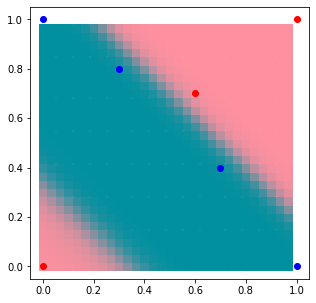

In [897]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
resolution=30
for i in range(resolution):
    for j in range(resolution):
        c=hex(int(Calculate([i/resolution,j/resolution])*256))[2:]
        if(len(c)==1):
            c='0'+c
        colors="#"+c+"909f"
        ax.scatter(i/resolution,j/resolution,color=colors,marker='s',s=60)
for i in range(len(datas)):
    ax.scatter(datas[i,0],datas[i,1],color="red" if datas[i,2]==1 else "blue")
plt.show()